<a href="https://colab.research.google.com/github/Fundkdh/algorithm-2022/blob/main/python_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [8]:
import pandas as pd
df2 = pd.read_csv("/content/drive/MyDrive/Ashopping2.csv", encoding = '"cp949')
df2

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [11]:
import math
from sklearn import preprocessing #데이터 전처리
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화
from sklearn.preprocessing import StandardScaler #데이터 표준화
from scipy.stats import boxcox 
df2["총_매출액_scale"] = preprocessing.scale(df2["총_매출액"])

In [12]:
df2["총_매출액_scale"].describe() #총 매출액 정리


count    1.000000e+03
mean     4.440892e-17
std      1.000500e+00
min     -6.889126e-01
25%     -5.407834e-01
50%     -3.380653e-01
75%      1.194335e-01
max      1.005364e+01
Name: 총_매출액_scale, dtype: float64

In [14]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df2)
df_minmax
df_minmax = pd.DataFrame(df_minmax)
df2["총_매출액_minmax"] = df_minmax[2]

In [15]:
df2["총_매출액_minmax"] #총 매출액의  정규값

0      0.023198
1      0.011986
2      0.005467
3      0.049128
4      0.153399
         ...   
995    0.038279
996    0.107539
997    0.006276
998    0.120284
999    0.012179
Name: 총_매출액_minmax, Length: 1000, dtype: float64

In [16]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [17]:
x_scale = df2[["방문빈도", "할인권_사용 횟수"]] #x_scale 정의
x_noscale = df2[["이탈여부", "거주지역"]]  #x_noscale 정의
scaler = MinMaxScaler() # 스케일러 정의
x_scale_minmax = scaler.fit_transform(x_scale) # x_scale을 fit(), transform()
x_scale_minmax = pd.DataFrame(x_scale_minmax)
x_scale_minmax
x_scale_minmax2 = scaler.fit_transform(x_noscale) #x_noscale 값을 fit(), transform()
x_scale_minmax2 = pd.DataFrame(x_scale_minmax2)
x_scale_minmax2

,0,1
0,0.0,0.833333
1,1.0,0.500000
2,0.0,0.833333
3,0.0,0.666667
4,0.0,0.833333
...,...,...
995,0.0,0.833333
996,0.0,0.833333
997,0.0,0.500000
998,0.0,0.666667


In [18]:
x = pd.concat([x_scale_minmax, x_noscale], axis = 1) #열 기준으로 x_scale_minmax 값과 x_noscale 값을 합친다.
x

,0,1,이탈여부,거주지역
0,0.074627,0.000000,0,6
1,0.059701,0.724138,1,4
2,0.079602,0.172414,0,6
3,0.074627,0.000000,0,5
4,0.353234,0.275862,0,6
...,...,...,...,...
995,0.029851,0.068966,0,6
996,0.233831,0.172414,0,6
997,0.039801,0.241379,0,4
998,0.064677,0.655172,0,5


In [21]:
x_scale_minmax.columns = ["방문빈도", "할인권_사용 횟수"] # 인덱스값 출력력
x_scale_minmax.columns

Index(['방문빈도', '할인권_사용 횟수'], dtype='object')

In [44]:
x_minmax = pd.DataFrame (x_scale_minmax)
x_minmax

,방문빈도,할인권_사용 횟수
0,0.074627,0.000000
1,0.059701,0.724138
2,0.079602,0.172414
3,0.074627,0.000000
4,0.353234,0.275862
...,...,...
995,0.029851,0.068966
996,0.233831,0.172414
997,0.039801,0.241379
998,0.064677,0.655172


In [23]:
x_minmax

NameError: ignored

In [24]:
df2.columns #df2값 정리리

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

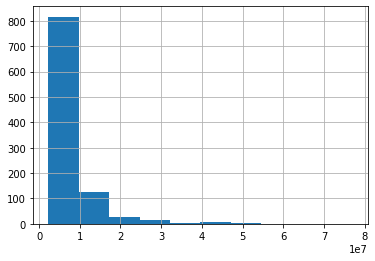

In [26]:
df2.총_매출액.hist() #총_매출액 그래프프

In [27]:
from scipy import stats

In [28]:
#일표본 t-test
print(df2.총_매출액.mean())

print(stats.ttest_1samp(df2["총_매출액"], 7068689))# 한 집단 평균 검정
# 상관 관계가 있다.

7068689.76
Ttest_1sampResult(statistic=3.449911869706077e-06, pvalue=0.9999972480573434)


In [30]:
#독립표본 t-test 

no_claim = df2[df2["클레임접수여부"]==0]
no_claim
claim = df2[df2["클레임접수여부"] ==1]
claim

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,총_매출액_scale,총_매출액_minmax
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,-0.630187,0.005467
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,-0.161153,0.049128
7,8,0,12717240,109,116672,4,354735,1,2,1,...,5,7,6,6,5,6,6,6,0.811239,0.139646
13,14,0,4098600,15,273240,14,334100,2,4,1,...,6,6,6,4,5,7,6,6,-0.426561,0.024422
14,15,0,3754700,21,178795,23,380200,2,4,1,...,6,6,7,4,5,5,5,5,-0.475952,0.019824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,986,0,5358350,16,334897,26,364650,1,4,1,...,5,6,5,5,6,6,6,6,-0.245637,0.041264
986,987,0,7879000,35,225114,14,333850,1,2,1,...,7,6,6,4,5,6,6,6,0.116376,0.074963
989,990,0,2540870,15,169391,23,379950,2,4,1,...,5,6,5,6,6,5,5,5,-0.650281,0.003596
991,992,0,9302490,40,232562,10,304450,1,2,1,...,6,6,6,6,6,6,6,6,0.320816,0.093993


In [31]:
no_claim.방문빈도.mean() #방문기록에 대한 평균균

28.184842883548985

In [32]:
claim.방문빈도.mean() #claim 값 평균균

24.736383442265794

In [33]:
print(stats.ttest_ind(no_claim['방문빈도'], claim['방문빈도'], equal_var = False)) #두 독립표본에 대한 t 점정

Ttest_indResult(statistic=2.595726838875684, pvalue=0.009577734932789503)


In [36]:
!pip install pingouin #분산분석을 위한 패키지지
!pip install scikit_posthocs #사후태스트를 위한 패키지지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [40]:
df2["구매유형"].describe()# 구매유형에 대해서 describe

count    1000.000000
mean        3.093000
std         0.988599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: 구매유형, dtype: float64

In [41]:
df2.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       '총_매출액_scale', '총_매출액_minmax'],
      dtype='object')

In [48]:
df1 = df2 [["구매유형", "총_매출액"]]
pd.options.display.float_format = '{:.3f}'.format# display 옵션 설정 값들이 소숫점 아래 3개로 표현되기로 
type1 = [ ]
for i in range(1, 5, 1):
  type1.append(df1[df1.구매유형 == i].총_매출액)
sp.stats.levene(type1[0], type1[1], type1[2], type1[3]) #등분산 분석을 활용한다. levene -test 결과 등분산이 깨졌다.

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [49]:
pg.welch_anova(dv = "총_매출액", between ="구매유형", data = df2) #등분산이 아닌 경우
#귀무가설 : 각 구매유형 별로 총매출액 평균이 같다.
#대립가설 : 각 구매유형 별로 총 매출액 평균이 다르다.


,Source,ddof1,ddof2,F,p-unc,np2
0,구매유형,3,230.936,88.238,0.000,0.193
